# Investigating the wind parameter for the Ocean dataset

In the following, we will take a look at the Ocean dataset, and how the computed eigenfunctions change when varying a wind parameter. As data generation takes a lot of time in these cases (we have to compute the dynamic Laplacian hundreds of times), all data shown has been pregenerated and is just loaded, so the system itself is not shown here. It is however identical to the Matlab implementation (except for small technical details).

The main tool for looking at the system will be plots of eigenvalues *λ* against the changing parameter, as the linear response for it is just a usual 1D derivative, so it is much easier to illustrate issues like smoothness etc. than for the full eigenfunction. Of course the expectation that the linear response for *u* behaves in the same way as *λ* is just an assumption, but does not seem too far fetched.

In [1]:
using Plots, DelimitedFiles

To start, we illustrate the 'ideal' case of the rotating double gyre, where everything works as expected:

## Rotating Double Gyre

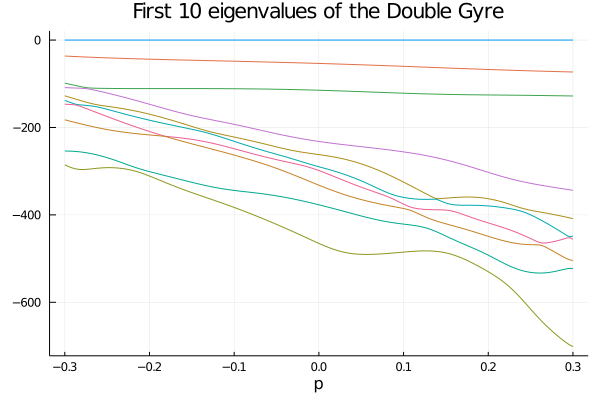

In [2]:
base_path = "D:/Uni/3 Mathematics in Data Science/05 Masterarbeit/Experimente/"
directory = "double_gyre_param_plots_cg/"
filename = "gyre_eigenvalues_n=300_tol=1.0e-9_qo=5_solver=BS5(true)_method=CG.csv"
file = readdlm(base_path*directory*filename, ',', Float64, '\n')
Plots.plot(file[:,1],file[:,2:end],label="")
Plots.plot!(xlabel="p",title="First 10 eigenvalues of the Double Gyre")

(Here we can also see the rather interesting phenomenon of eigenvalues changing their palces, e.g. when the the fifth and sixth eigenvalues switch at around p=0.13. We will however ignore this in the following, as it doesn't really affect our main point.)

The eigenvalues all behave nicely and smooth, and is no problem to find a tangent, which is what the linear response is effectively doing:

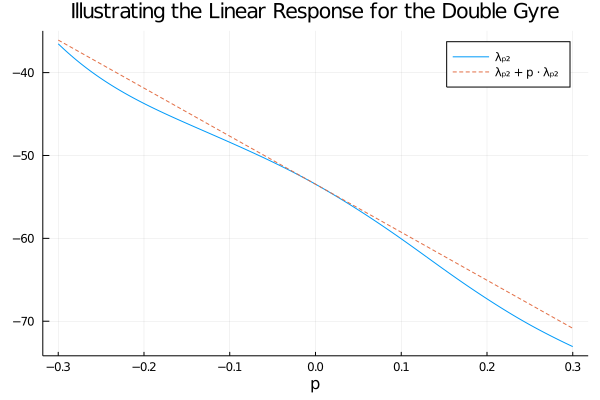

In [3]:
λ_dot = -57.970339050982744 # also precomputed
Plots.plot(file[:,1],file[:,3],label="λₚ₂")
Plots.plot!(file[:,1],file[:,1]*λ_dot .+ file[Int((size(file)[1]+1)/2),3],label="λₚ₂ + p ⋅ λₚ₂",style=:dash)
Plots.plot!(xlabel="p",title="Illustrating the Linear Response for the Double Gyre")

## The Ocean system with the wind parameter

The system we are mainly interested in is the Ocean system, with a parameter p that describes the influence of wind on the system. In the following, the gridsize is fixed at 200x120 and the *wind_scale* at 1e-5, meaning that a change of ϵ by 1 results of a change in the order of 1e-5 of the wind effect (which isn't constant with varying lattitude)

In [15]:
base_path = "[Anonymized]"
directory = "ocean_wind_param_plots_cg/";

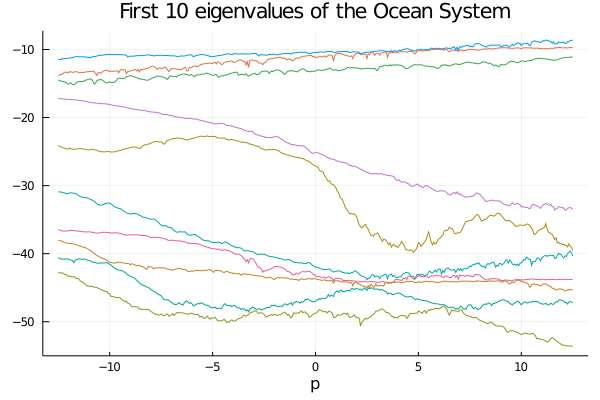

In [5]:
filename = "ocean_wind_200_12.5_70.0.csv"
file = readdlm(base_path*directory*filename, ',', Float64, '\n')
Plots.plot(file[:,1],file[:,2:end],label="")
Plots.plot!(xlabel="p",title="First 10 eigenvalues of the Ocean System")

We immediately notice two things:

1. The eigenvalues don't change as smoothly as they do for the double gyre and are rather rugged.
2. The first two eigenvalues are very close together, possibly switching many times

We will focus on the first observation, as we hypothesisize that this is the reason for a poor performance of methods computing a linear response.

Let us focus on the third eigenvector to further illustrate this point:

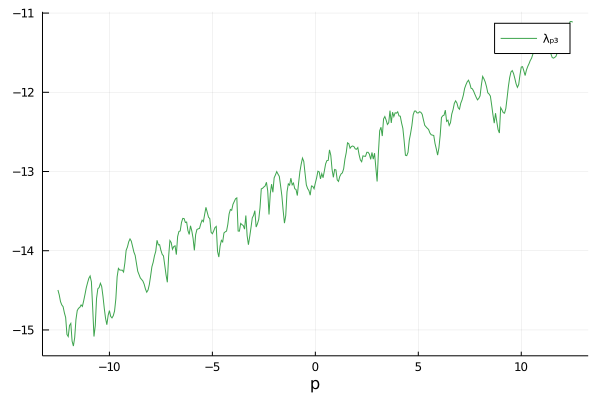

In [6]:
Plots.plot(file[:,1],file[:,4],label="λₚ₃",color=3)
Plots.plot!(xlabel="p")

We can clearly see that attempting to find a tangent line at 0 here could be both very hard and almost useless, as it wouldn't reflect the general trend, except by chance.

Next, let us zoom in a bit (from 10 to 1), maybe we just picked the wrong scale:

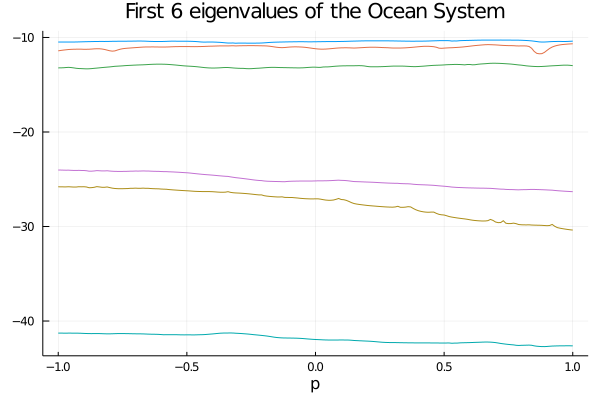

In [7]:
filename = "ocean_wind_200_1.0_70.0.csv"
file = readdlm(base_path*directory*filename, ',', Float64, '\n')
plot_all = Plots.plot(file[:,1],file[:,2:end],label="")
Plots.plot!(xlabel="p",title="First 6 eigenvalues of the Ocean System")

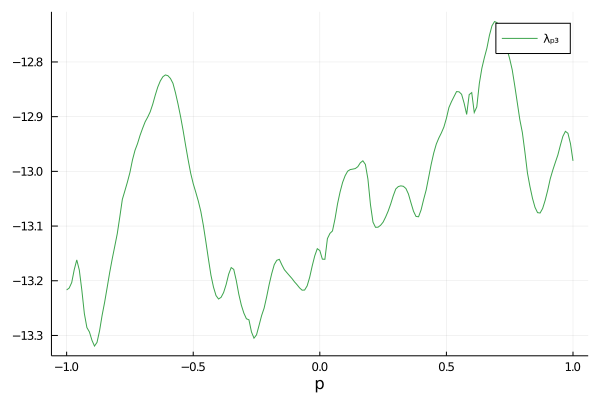

In [8]:
Plots.plot(file[:,1],file[:,4],label="λₚ₃",color=3)
Plots.plot!(xlabel="p")

Indeed, the plots now look a bit smoother, indicating that we don't really deal with a numerical issue. However, the relative changes here are probably too small to be relevant, so this can't really be the right scale either.

We can repeat this,  zooming in from 1 to 0.1 once more, just to get a complete picture:

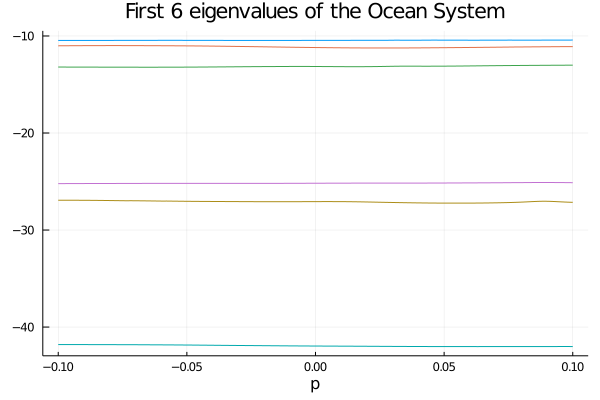

In [9]:
filename = "ocean_wind_200_0.1_70.0.csv"
file = readdlm(base_path*directory*filename, ',', Float64, '\n')
Plots.plot(file[:,1],file[:,2:end],label="")
Plots.plot!(xlabel="p",title="First 6 eigenvalues of the Ocean System")

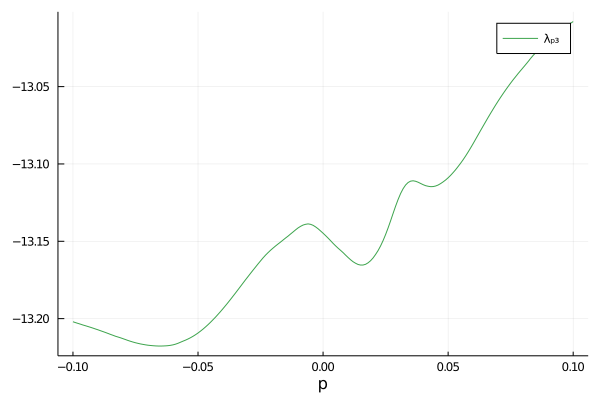

In [10]:
Plots.plot(file[:,1],file[:,4],label="λₚ₃",color=3)
Plots.plot!(xlabel="p")

## Comparing different timesteps

Up until now, all plots depicted the situation at t=70. We could try to reduce this time horizon and see if the system becomes smoother, as it "does not have enough time for the nonlinearities to take effect".

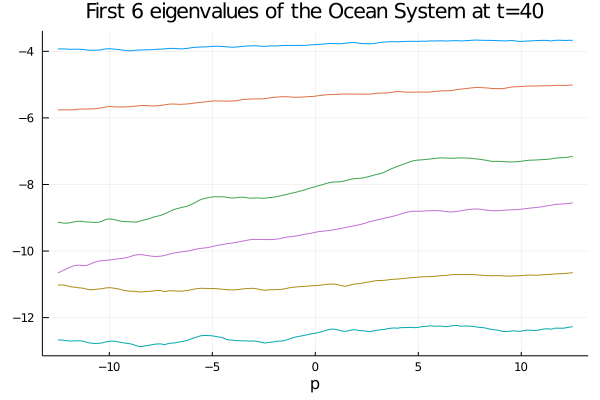

In [11]:
filename = "ocean_wind_200_12.5_40.0.csv"
file = readdlm(base_path*directory*filename, ',', Float64, '\n')
Plots.plot(file[:,1],file[:,2:end],label="")
Plots.plot!(xlabel="p",title="First 6 eigenvalues of the Ocean System at t=40")

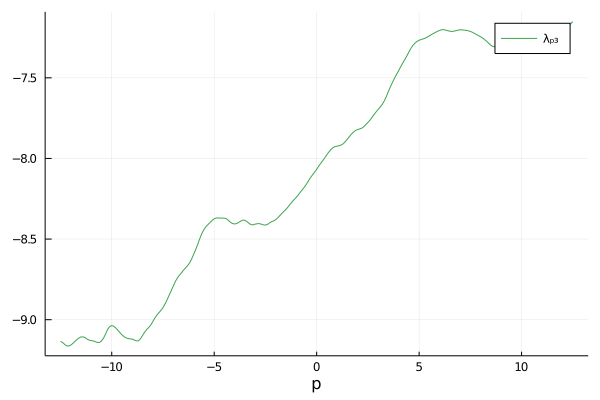

In [12]:
Plots.plot(file[:,1],file[:,4],label="λₚ₃",color=3)
Plots.plot!(xlabel="p")

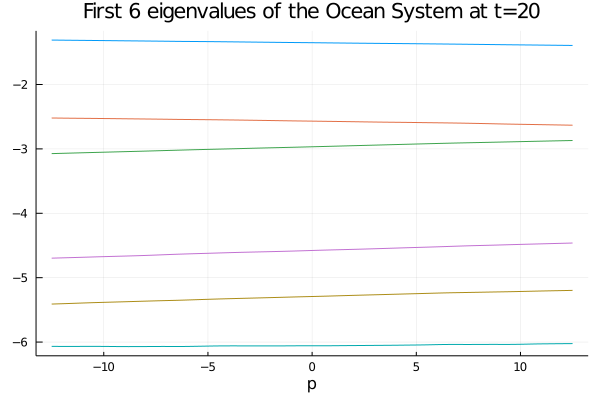

In [13]:
filename = "ocean_wind_200_12.5_20.0.csv"
file = readdlm(base_path*directory*filename, ',', Float64, '\n')
Plots.plot(file[:,1],file[:,2:end],label="")
Plots.plot!(xlabel="p",title="First 6 eigenvalues of the Ocean System at t=20")

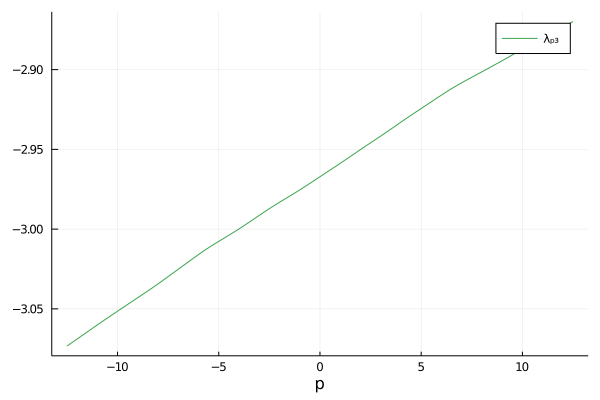

In [14]:
Plots.plot(file[:,1],file[:,4],label="λₚ₃",color=3)
Plots.plot!(xlabel="p")

Indeed, just as predicted, the system becomes more "linear" the less time passes. However, it also becomes less interesting, as illustrated by the first four eigenfunctions at this timestep, which don't form the expected clear gyres:

![](evs_at_t_20.png)